<a href="https://colab.research.google.com/github/Kim-jong-hoon/week-7-1/blob/main/day1_homework_quesetions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 Homework: 칼만필터와 데이터 추적기법
이 과제는 강의와 실습에서 배운 칼만필터와 센서 융합 개념을 복습하고 확장합니다. Python 표준 라이브러리, NumPy, matplotlib만 사용하세요.

**제출 방법:**
- 각 셀을 실행하고 결과(플롯, 수치, 설명)를 작성하세요.
- Colab에서 파일을 저장 후 Google Drive/이메일로 제출하세요.


## Task 1: 새로운 위치 데이터에 칼만필터 적용

**설명:**
- 제공된 `new_positions.csv` 파일(또는 직접 생성)에서 위치 데이터를 불러와 칼만필터로 보정하세요.
- 보정 전/후 데이터를 모두 출력하세요.

**힌트:**
- 파일이 없으면 `random.gauss`로 20개 데이터 생성
- 칼만필터 코드는 실습 예시 참고


In [1]:
# Task 1: 새로운 위치 데이터에 칼만필터 적용
import random
import numpy as np

# Step 1: 데이터 불러오기 또는 생성
try:
    import pandas as pd
    data = pd.read_csv('new_positions.csv')
    measured_positions = data['position'].tolist()
except Exception:
    measured_positions = [random.gauss(0, 1.5) for _ in range(20)]

# Step 2: 칼만필터 적용
#### FILL THIS
estimate = 0
estimate_error = 1
measurement_error = 1
estimates = []
for z in measured_positions:
    kalman_gain = estimate_error / (estimate_error + measurement_error)
    estimate = estimate + kalman_gain * (z - estimate)
    estimate_error = (1 - kalman_gain) * estimate_error
    estimates.append(estimate)

print('원본 데이터:', measured_positions)
print('보정 데이터:', estimates)


원본 데이터: [0.2426345028263971, 2.241255195299874, -0.7424809576807613, 0.5061934026917294, -1.02150187251413, 1.5528449169839682, -2.840494828843059, 2.678545588678441, 0.04383092670594702, 1.7988332245016498, -0.6825023334258469, 1.4264272306599608, -1.2801416964020809, 1.3942332601388172, 2.8095610338629795, 0.6116805531223911, -1.0204264547409139, 1.0035662730642287, -1.381735088133878, -3.038695948679731]
보정 데이터: [0.12131725141319855, 0.8279632327087569, 0.4353521851113774, 0.4495204286274478, 0.20435004510385144, 0.39699216965815387, -0.007693705154497743, 0.2907773274936065, 0.2660826874148406, 0.40542364533182323, 0.3147631471020174, 0.4002757689141669, 0.28024594996300634, 0.3545117706413937, 0.5079523495927428, 0.5140540086238986, 0.42880509399252015, 0.45905568236471533, 0.36701614383978565, 0.20483937752933248]


## Task 2: GPS와 IMU 데이터 융합 및 시각화

**설명:**
- `random.gauss`로 GPS(노이즈=1.0), IMU(노이즈=2.0) 데이터 각각 20개 생성
- 가중 평균(예: GPS: 0.7, IMU: 0.3)으로 융합
- 원본(GPS, IMU)과 융합 데이터를 matplotlib으로 한 그래프에 플롯

**힌트:**
- 실습의 센서 융합 코드를 참고하세요.


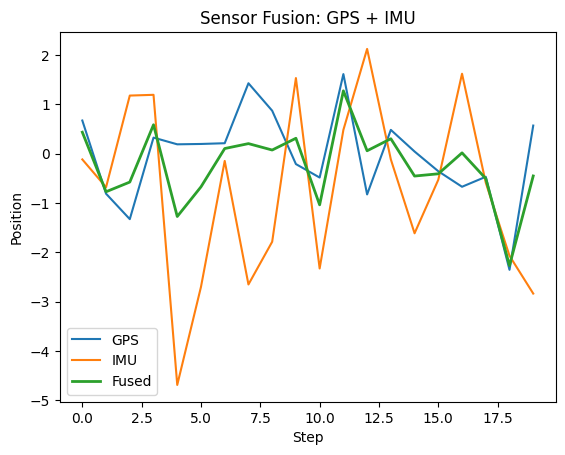

In [3]:
# Task 2: GPS와 IMU 데이터 융합 및 시각화
import random
import matplotlib.pyplot as plt

# Step 1: 데이터 생성
true_position = 0
gps_positions = [true_position + random.gauss(0, 1.0) for _ in range(20)]
imu_positions = [true_position + random.gauss(0, 2.0) for _ in range(20)]

# Step 2: 가중 평균 융합
w_gps = 0.7
w_imu = 0.3
#### FILL THIS
fused_positions = [
    w_gps * gps + w_imu * imu
    for gps, imu in zip(gps_positions, imu_positions)
]

# Step 3: 시각화
plt.plot(gps_positions, label='GPS')
plt.plot(imu_positions, label='IMU')
plt.plot(fused_positions, label='Fused', linewidth=2)
plt.legend()
plt.title('Sensor Fusion: GPS + IMU')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()


## Task 3: 융합이 정확도를 높이는 이유 설명

**설명:**
- Task 2에서 센서 융합이 왜 더 정확한 위치 추정에 도움이 되는지 1~2문장으로 설명하세요.

**힌트:**
- 각 센서의 장단점, 노이즈 특성에 주목하세요.


In [4]:
# Task 3: 아래 셀에 1~2문장으로 답변을 작성하세요.
# 예시: "센서 융합은 각 센서의 노이즈 특성을 보완하여 더 정확한 위치 추정을 가능하게 합니다."

answer = "Gps의 장점 : 전역 위치 파악, 오차 누적 없음/ 단점 :낮은 수신율, 터널/도심 음영 존재 "
print(answer)


Gps의 장점 : 전역 위치 파악, 오차 누적 없음/ 단점 :낮은 수신율, 터널/도심 음영 존재 


---

### 제출 및 채점 안내
- 모든 셀을 실행하고 결과(플롯, 수치, 설명)를 작성하세요.
- Colab에서 파일을 저장 후 Google Drive/이메일로 제출하세요.
- 채점 기준: 코드(50%), 출력(30%), 설명(20%)
